In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('day4patient.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# EDA

In [72]:
# Checking for missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [74]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [77]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname              int64
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [78]:
df.shape

(10000, 14)

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

<Axes: xlabel='Gender', ylabel='count'>

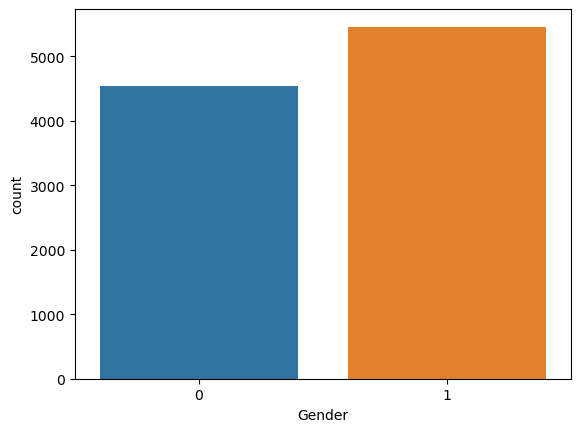

In [85]:
sns.countplot(data=df,x='Gender')

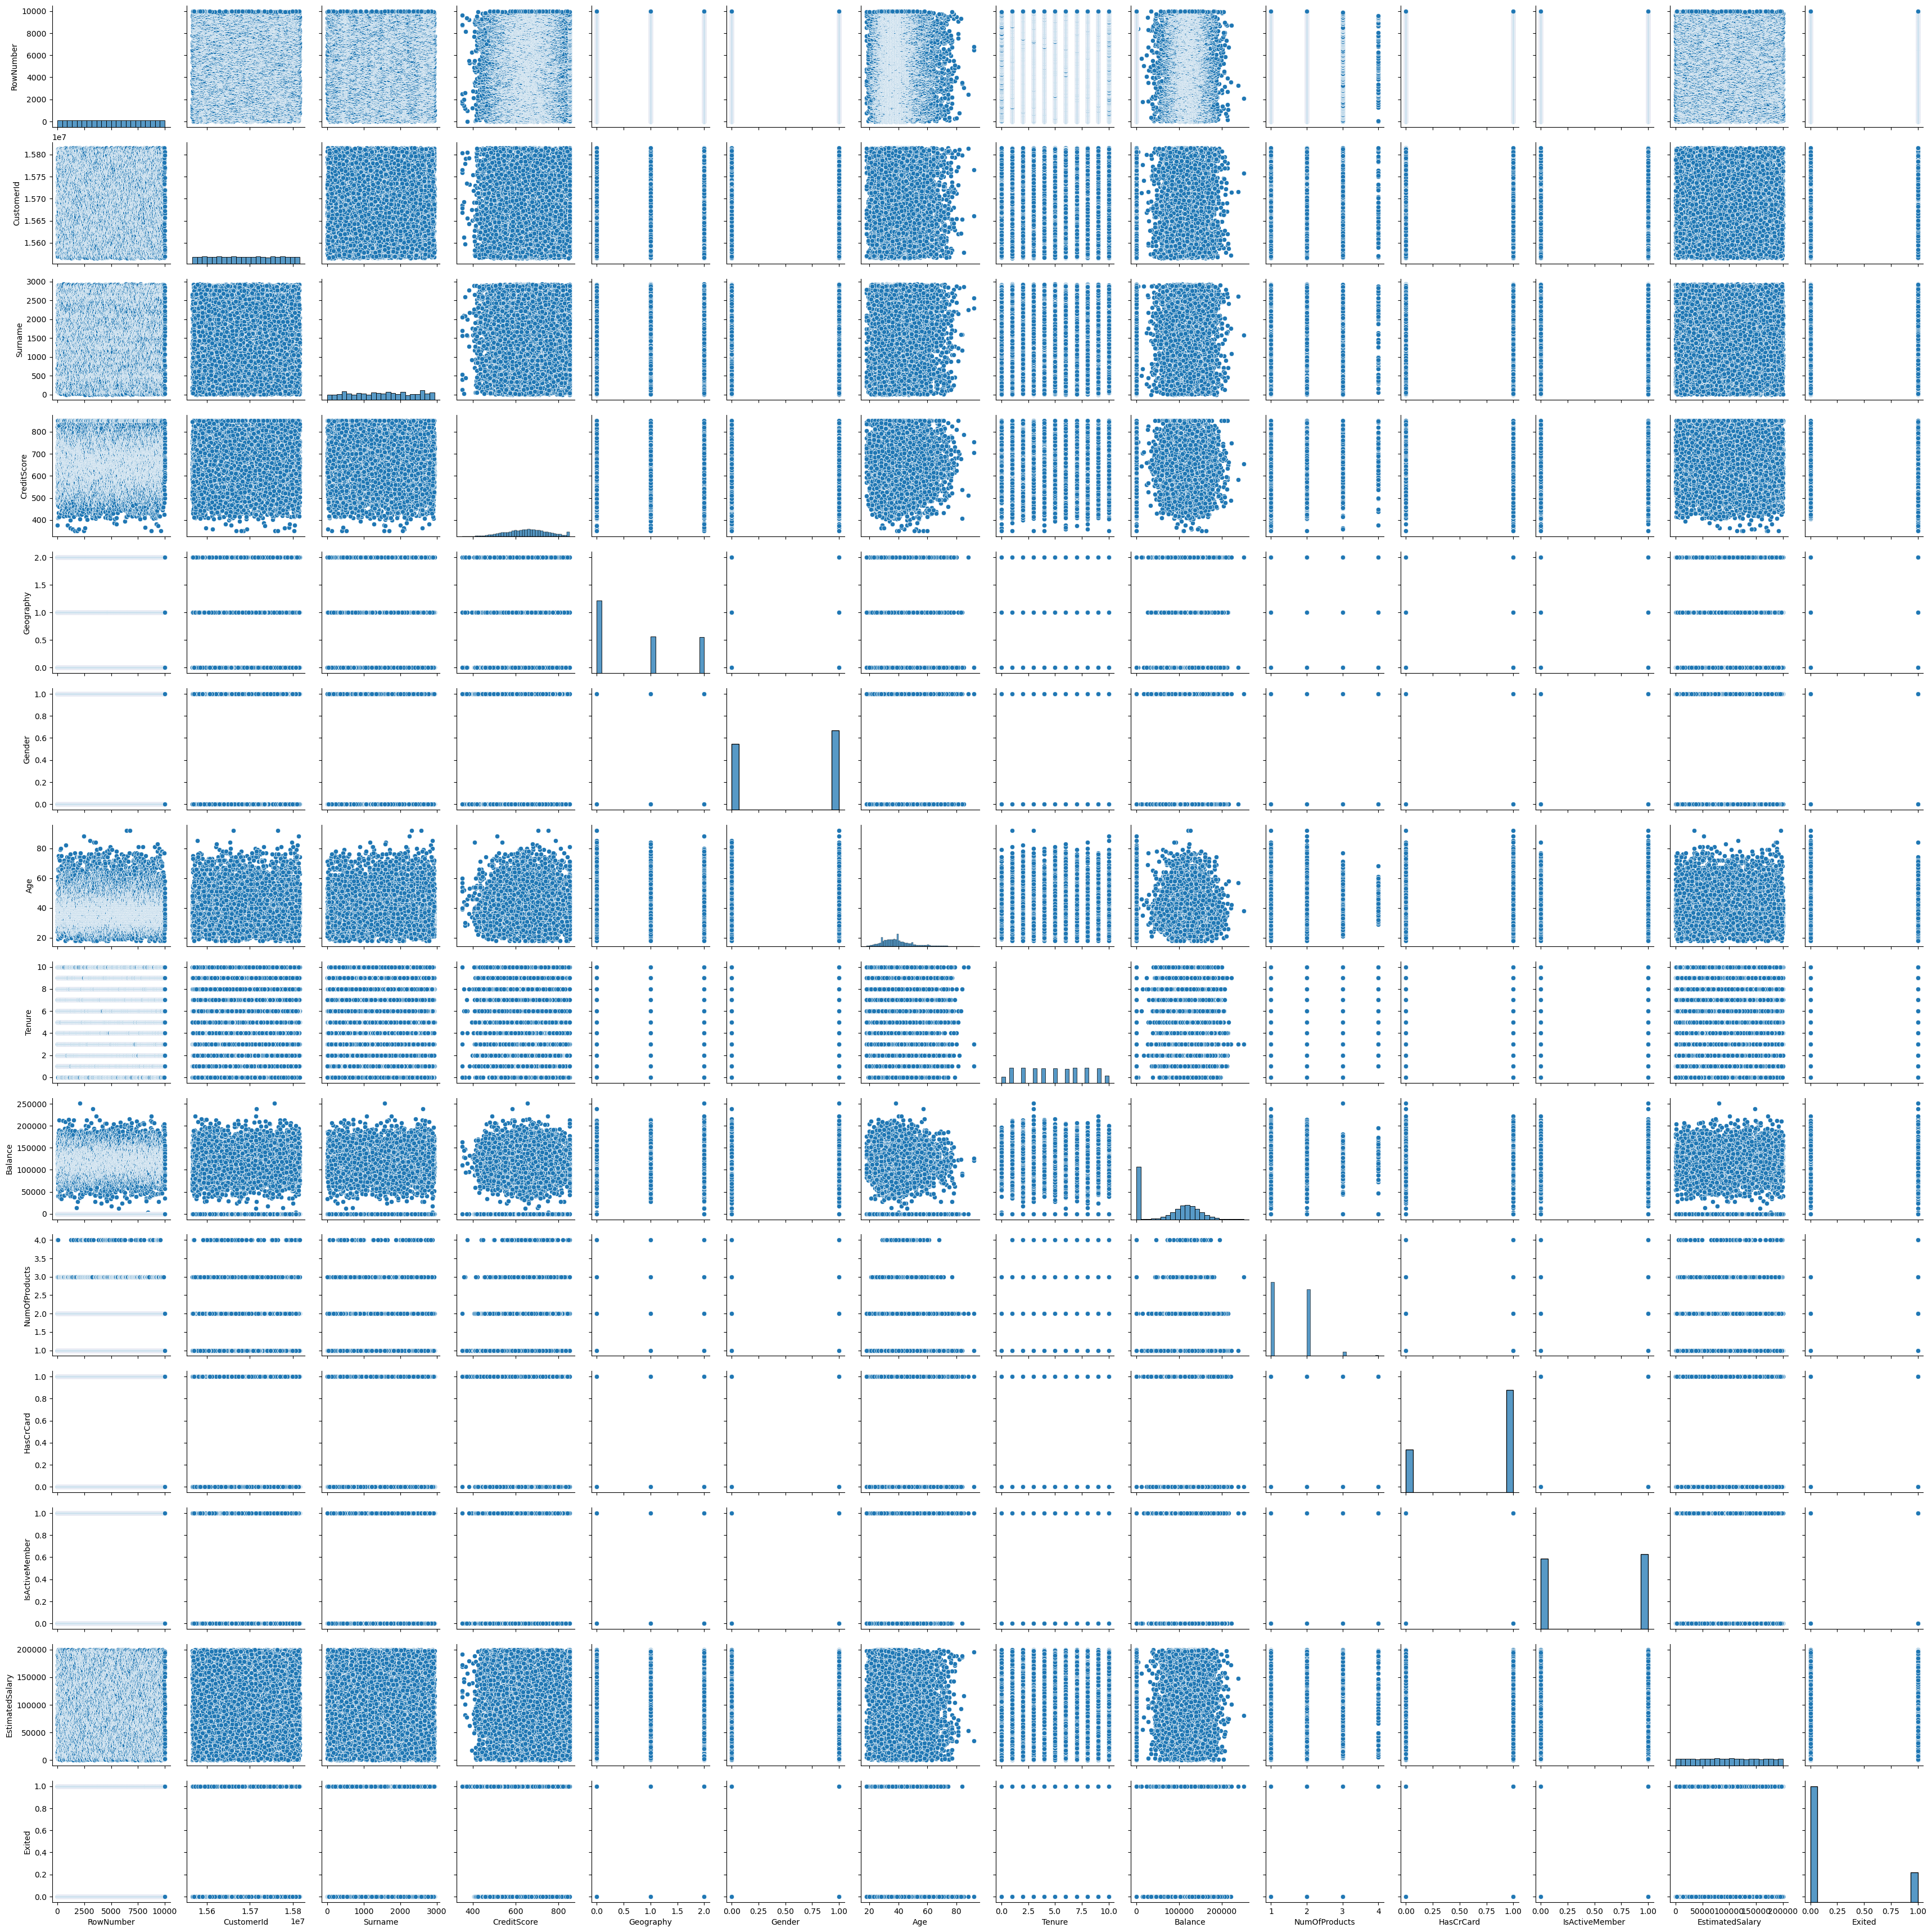

In [86]:
sns.pairplot(df)

In [87]:
df.corr()

RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber         1.000000    0.004202  0.001682     0.005840  -0.010358   
CustomerId        0.004202    1.000000  0.005689     0.005308   0.006516   
Surname           0.001682    0.005689  1.000000     0.007489  -0.022878   
CreditScore       0.005840    0.005308  0.007489     1.000000   0.007888   
Geography        -0.010358    0.006516 -0.022878     0.007888   1.000000   
Gender            0.018196   -0.002641 -0.002049    -0.002857   0.004719   
Age               0.000783    0.009497  0.005550    -0.003965   0.022812   
Tenure           -0.006495   -0.014883 -0.017412     0.000842   0.003739   
Balance          -0.009067   -0.012419  0.002657     0.006268   0.069408   
NumOfProducts     0.007246    0.016972 -0.016460     0.012238   0.003972   
HasCrCard         0.000599   -0.014025 -0.008993    -0.005458  -0.008523   
IsActiveMember    0.012044    0.001665  0.001483     0.025651   0.006724   
EstimatedSalary  -0.005988    0.015271  0.011850    -0.001384  -0.001369   
Exited           -0.016571   -0.006248 -0.010822    -0.027094   0.035943   

                   Gender       Age    Tenure   Balance  NumOfProducts  \
RowNumber        0.018196  0.000783 -0.006495 -0.009067       0.007246   
CustomerId      -0.002641  0.009497 -0.014883 -0.012419       0.016972   
Surname         -0.002049  0.005550 -0.017412  0.002657      -0.016460   
CreditScore     -0.002857 -0.003965  0.000842  0.006268       0.012238   
Geography        0.004719  0.022812  0.003739  0.069408       0.003972   
Gender           1.000000 -0.027544  0.014733  0.012087      -0.021859   
Age             -0.027544  1.000000 -0.009997  0.028308      -0.030680   
Tenure           0.014733 -0.009997  1.000000 -0.012254       0.013444   
Balance          0.012087  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts   -0.021859 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard        0.005766 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember   0.022544  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary -0.008112 -0.007201  0.007784  0.012797       0.014204   
Exited          -0.106512  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
RowNumber         0.000599        0.012044        -0.005988 -0.016571  
CustomerId       -0.014025        0.001665         0.015271 -0.006248  
Surname          -0.008993        0.001483         0.011850 -0.010822  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Geography        -0.008523        0.006724        -0.001369  0.035943  
Gender            0.005766        0.022544        -0.008112 -0.106512  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

<Axes: >

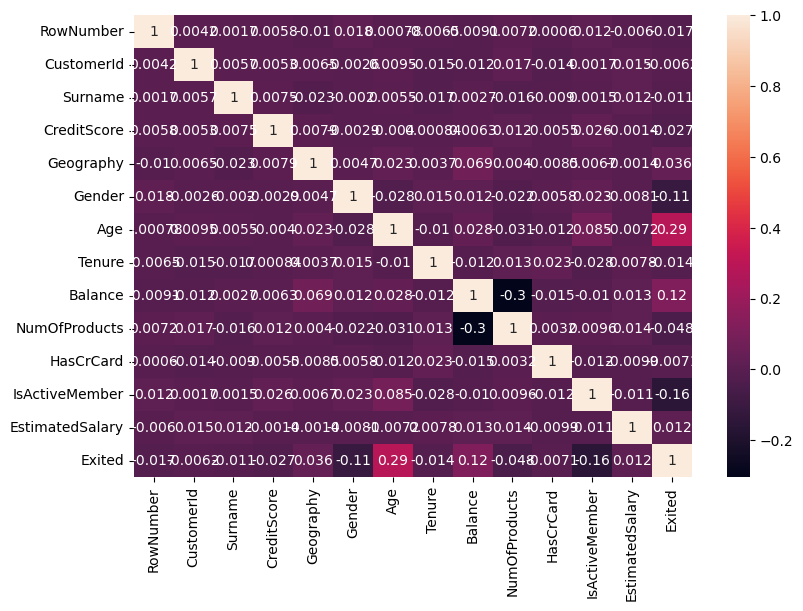

In [89]:
fig=plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)

<Axes: >

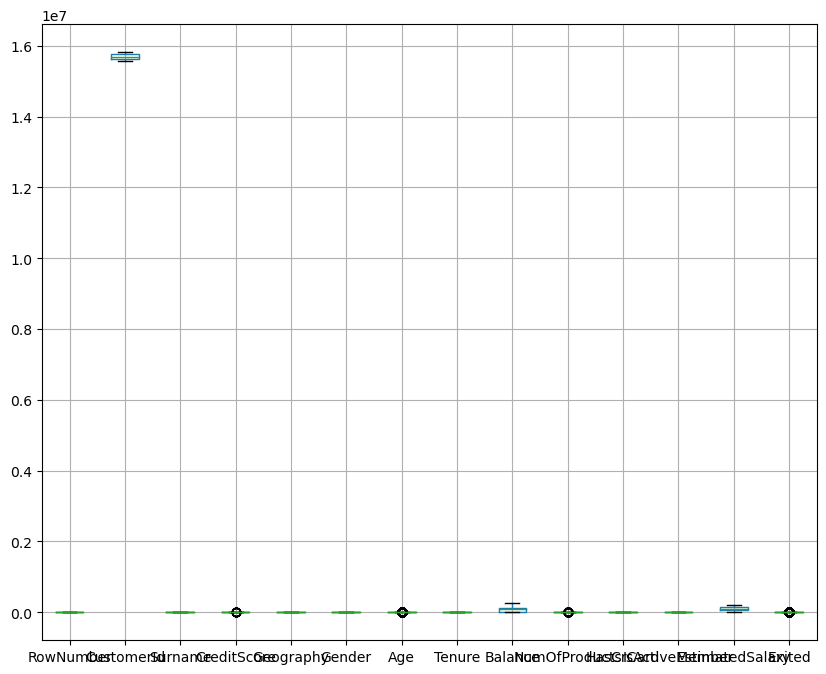

In [90]:
df.boxplot(figsize=(10,8))

In [91]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Assign X & Y

In [92]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (10000, 13)

Y shape:	 (10000, 1)


# Spliting the data between test and training

In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=2)

# Build NB - Gaussian Model

In [94]:
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_gauss = gauss_nb.predict(xtest)
print('Predicted value is: \t',ypred_gauss)
print()
print('Testing completed')
print('='*75)
# Performance Measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('*'*15 + 'Performance Measures on Gaussian Navie Bayes' + '*'*16)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_gauss))
print()
print('='*75)

Training Completed

Predicted value is: 	 [0 0 0 ... 0 0 0]

Testing completed
***************Performance Measures on Gaussian Navie Bayes****************
Accuracy score:	
 0.7955


Confusion matrix:	
 [[1570   47]
 [ 362   21]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1617
           1       0.31      0.05      0.09       383

    accuracy                           0.80      2000
   macro avg       0.56      0.51      0.49      2000
weighted avg       0.72      0.80      0.73      2000




C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Build NB - Multinomial Model

In [96]:
from sklearn.naive_bayes import MultinomialNB
mul_nb = MultinomialNB()
mul_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_mul_nb = mul_nb.predict(xtest)
print('Predicted value is: \t',ypred_mul_nb)
print()
print('Testing completed')
print('='*75)
#Performance Measure
accuracy_mul_nb=accuracy_score(ytest,ypred_mul_nb)
print('*'*14 + 'Performance Measures on Multinomial Navie Bayes' + '*'*14)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_mul_nb))
print()
print('='*75)


Training Completed

Predicted value is: 	 [1 1 0 ... 0 0 1]

Testing completed
**************Performance Measures on Multinomial Navie Bayes**************
Accuracy score:	
 0.5185


Confusion matrix:	
 [[780 837]
 [126 257]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.86      0.48      0.62      1617
           1       0.23      0.67      0.35       383

    accuracy                           0.52      2000
   macro avg       0.55      0.58      0.48      2000
weighted avg       0.74      0.52      0.57      2000




C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Build NB - Bernoulli Model

In [98]:
from sklearn.naive_bayes import BernoulliNB
ber_nb = BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_ber_nb = ber_nb.predict(xtest)
print('Predicted value is: \t',ypred_ber_nb)
print()
print('Testing completed')
print('='*75)
#Performace Measure
accuracy_ber_nb=accuracy_score(ytest,ypred_ber_nb)
print('*'*15 + 'Performance Measures on Bernoulli Navie Bayes' + '*'*15)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_ber_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [0 0 0 ... 0 0 0]

Testing completed
***************Performance Measures on Bernoulli Navie Bayes***************
Accuracy score:	
 0.8085


Confusion matrix:	
 [[1617    0]
 [ 383    0]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1617
           1       0.00      0.00      0.00       383

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000




C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMet

In [99]:
print(gauss_nb,'=',accuracy_gauss)
print(mul_nb,'=',accuracy_mul_nb)
print(ber_nb,'=',accuracy_ber_nb)

GaussianNB() = 0.7955
MultinomialNB() = 0.5185
BernoulliNB() = 0.8085


In [100]:
x.shape

(10000, 13)

# Ensemble Model

# 1. Bagging Classifier

In [102]:
#Baggingclassifier
from sklearn.ensemble import BaggingClassifier
bagc=BaggingClassifier(base_estimator=gauss_nb,n_estimators=5,random_state=10)
bagc.fit(xtrain,ytrain)#train the model
#test the model
ypred_bagc=bagc.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy Score:\t',accuracy_bagc)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_bagc))
print('='*100)


****************************************************************************************************
Confusion Matrix:
 [[1569   48]
 [ 365   18]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7935
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1617
           1       0.27      0.05      0.08       383

    accuracy                           0.79      2000
   macro avg       0.54      0.51      0.48      2000
weighted avg       0.71      0.79      0.73      2000



C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# 2. RandomForestClassifier model

In [103]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=10,random_state=1)
rand_for.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand=rand_for.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy Score:\t',accuracy_rand)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand))
print('='*100)


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


****************************************************************************************************
Confusion Matrix:
 [[1550   67]
 [ 242  141]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.8455
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1617
           1       0.68      0.37      0.48       383

    accuracy                           0.85      2000
   macro avg       0.77      0.66      0.69      2000
weighted avg       0.83      0.85      0.83      2000



In [105]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for_1=RandomForestClassifier(n_estimators=10,random_state=1,max_depth=None)
rand_for_1.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand_1=rand_for_1.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand_1))
print('-'*100)
accuracy_rand_1=accuracy_score(ytest,ypred_rand_1)
print('Accuracy Score:\t',accuracy_rand_1)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand_1))
print('='*100)


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


****************************************************************************************************
Confusion Matrix:
 [[1550   67]
 [ 242  141]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.8455
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1617
           1       0.68      0.37      0.48       383

    accuracy                           0.85      2000
   macro avg       0.77      0.66      0.69      2000
weighted avg       0.83      0.85      0.83      2000



# 3. ExtraTrees model

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree=ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)
extra_tree.fit(xtrain,ytrain)#train the model
#test the model
ypred_extra=extra_tree.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy Score:\t',accuracy_extra)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_extra))
print('='*100)

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
****************************************************************************************************
Confusion Matrix:
 [[1561   56]
 [ 266  117]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.839
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1617
           1       0.68      0.31      0.42       383

    accuracy                           0.84      2000
   macro avg       0.77      0.64      0.66      2000
weighted avg       0.82      0.84      0.81      2000



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# Model with Accuracy scores

In [107]:
scores=[('Gaussian_NB',accuracy_gauss),
 ('Multinomial_NB',accuracy_mul_nb),
 ('Bernoulli_NB',accuracy_ber_nb),
 ('Bagging_classifier',accuracy_bagc),
 ('RandomForest Classifier',accuracy_rand),
 ('RandomForest Classifier with pruning',accuracy_rand_1),
 ('ExtraTrees Classifier',accuracy_extra)

 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                                  Model  Accuracy_score
4               RandomForest Classifier          0.8455
5  RandomForest Classifier with pruning          0.8455
6                 ExtraTrees Classifier          0.8390
2                          Bernoulli_NB          0.8085
0                           Gaussian_NB          0.7955
3                    Bagging_classifier          0.7935
1                        Multinomial_NB          0.5185


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Bagging_classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

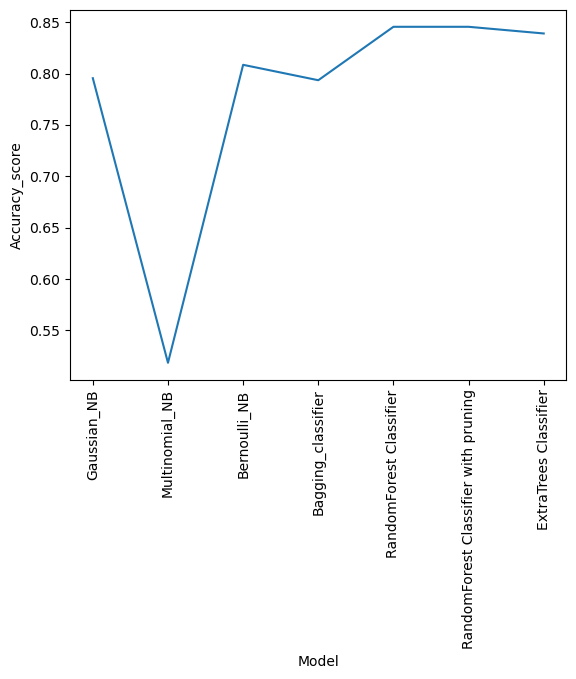

In [108]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)


# Implementation using Regression model

In [109]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (7500, 13)

Training data-y- Shape:	 (7500, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (2500, 13)

Testing data(y-Outcome) Shape:	 (2500, 1)


# Base Model

# 1. Linear Regression Model

In [110]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)


****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 0.11797841453442603

MSE-linear Regression:	 0.13791642318973904

RMSE linear Regression:	 0.37137100477788926


# 2. KNN Regression

In [111]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)


****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measures
****************************************************************************************************
Accuracy Score - knn Regression:	 -0.3535369039193448

MSE-knn Regression:	 0.21164444444444447

RMSE knn Regression:	 0.4600483066422965


# 3. Decision Tree Regression model

In [112]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 -0.38650840346882887

MSE-DT Regression:	 0.2168

RMSE DT Regression:	 0.46561786907291264


# 4. Support Vector Regressor

In [114]:
from sklearn.svm import SVR
svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('SVR Regression - Performance Measures')
print('*'*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))
print('Accuracy Score - SVR Regression:\t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
SVR Regression - Performance Measures
****************************************************************************************************
Accuracy Score - SVR Regression:	 -0.05650405464513675

MSE-SVR Regression:	 0.1651992000005322

RMSE SVR Regression:	 0.40644704452183217


# 5.Boosting - Adaboost with the base model - Lin reg

In [115]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Adaboost Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Adaboost Regression:	 0.07012250137083254

MSE-Adaboost Regression:	 0.14539936519565116

RMSE Adaboost Regression:	 0.3813126869062334


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# 6. Boosting - GradientBoost

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
GradientBoosting Regression - Performance Measures
****************************************************************************************************
Accuracy Score - GradientBoosting Regression:	 0.2765436213750202

MSE-GradientBoosting Regression:	 0.11312253318731637

RMSE GradientBoosting Regression:	 0.3363369340219958


# Model with Accuracy scores

In [117]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('SVR',Accuracy_svr),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),

 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
5  Gradient Boost Regressor        0.276544
0         Linear Regression        0.117978
4        Adaboost Regressor        0.070123
3                       SVR       -0.056504
1            KNN Regression       -0.353537
2  Decision Tree Regression       -0.386508


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

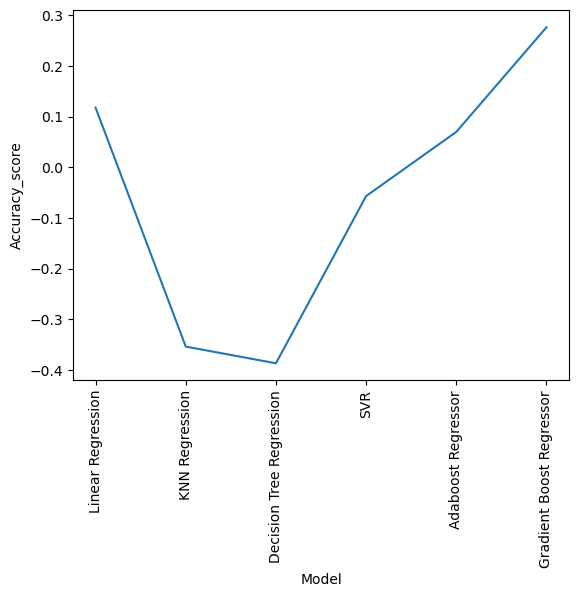

In [121]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)